In [30]:
import sys
sys.path.append("../SourceCode")

In [252]:
from dataManagement import DatabaseManagement
from tqdm import tqdm
import hvplot.pandas
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os
import json
plt.style.use('ggplot')
from candleStickPattern import CandleStickPatterns
import talib as talib
from plotly.offline import plot
import plotly.graph_objs as go

In [32]:
db = DatabaseManagement()

In [34]:
for i in tqdm(range(6)):
    df = db.ohlc_update('BTCUSD',update=True)
    print(f"Calls made: {i+1}")
    

 33%|███████████████                              | 2/6 [00:00<00:01,  3.94it/s]

Calls made: 1
Calls made: 2


 67%|██████████████████████████████               | 4/6 [01:01<00:33, 16.82s/it]

Calls made: 3
Calls made: 4


 83%|█████████████████████████████████████▌       | 5/6 [01:01<00:10, 10.80s/it]

Calls made: 5


100%|█████████████████████████████████████████████| 6/6 [02:01<00:00, 20.25s/it]

Calls made: 6


### GET CRYPTO DATA 

In [37]:
df = db.ticker_universe #property object not a function so please do not call () it... 
df2 = df.where(df.ticker == 'XRPUSD').dropna()
df2

,ticker,name,market,active
78,XRPUSD,Ripple,crypto,True


In [17]:
BTC_df = db.ohlc_update("BTCUSD")
BTC_df

,date,open,high,low,close,volume
0,2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800
1,2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089
2,2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718
3,2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100
4,2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737
...,...,...,...,...,...,...
725,2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537
726,2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007
727,2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022
728,2022-10-12,19058.900000,19240.30,18937.30,19155.92,30512.659581


In [18]:
ETH_df = db.ohlc_update("ETHUSD")
ETH_df

,date,open,high,low,close,volume
0,2020-10-12,374.38,395.810000,364.95600,387.00,553490.389576
1,2020-10-13,387.39,388.310000,374.10000,381.37,491870.404718
2,2020-10-14,381.74,388.470000,372.82500,379.08,442147.054015
3,2020-10-15,379.01,382.790000,369.75800,377.88,443673.417450
4,2020-10-16,377.89,380.203250,360.61300,365.21,362936.476200
...,...,...,...,...,...,...
725,2022-10-07,1352.18,1362.140000,1317.14808,1331.00,341770.659790
726,2022-10-08,1331.12,1337.700000,1303.60000,1315.71,101418.347412
727,2022-10-09,1315.26,1329.330000,1307.21000,1323.41,116675.842467
728,2022-10-10,1323.23,1338.410000,1287.31000,1290.06,299728.380746


In [19]:
SOL_df = db.ohlc_update("SOLUSD")
SOL_df

,date,open,high,low,close,volume
0,2021-02-25,24.600,24.600,13.8210,13.823,7.088429e+04
1,2021-02-26,13.854,15.404,13.1670,13.612,1.314144e+05
2,2021-02-27,13.590,14.691,13.1180,13.197,1.979224e+05
3,2021-02-28,13.179,13.741,11.5560,13.096,2.106576e+05
4,2021-03-01,13.109,16.890,13.0980,14.992,1.821690e+05
...,...,...,...,...,...,...
590,2022-10-08,32.970,33.070,32.3600,32.590,6.168081e+05
591,2022-10-09,32.571,33.140,32.4500,32.930,4.778466e+05
592,2022-10-10,32.920,33.460,31.8600,31.950,9.062605e+05
593,2022-10-11,31.954,31.954,30.4100,30.800,1.155072e+06


In [20]:
MATIC_df = db.ohlc_update("MATICUSD")
MATIC_df

,date,open,high,low,close,volume
0,2021-03-11,0.3871,0.5900,0.3140,0.4243,2.264423e+08
1,2021-03-12,0.4250,0.5376,0.3924,0.4145,3.999491e+08
2,2021-03-13,0.4147,0.4694,0.4097,0.4249,1.730590e+08
3,2021-03-14,0.4274,0.4385,0.3727,0.3806,1.189302e+08
4,2021-03-15,0.3812,0.4300,0.3781,0.3912,1.156087e+08
...,...,...,...,...,...,...
576,2022-10-08,0.8314,0.8348,0.8081,0.8148,8.173766e+06
577,2022-10-09,0.8146,0.8304,0.8079,0.8257,7.158747e+06
578,2022-10-10,0.8257,0.8431,0.8117,0.8137,2.261801e+07
579,2022-10-11,0.8137,0.8137,0.7844,0.7908,1.826499e+07


In [38]:
XRP_df = db.ohlc_update("XRPUSD")
XRP_df

,date,open,high,low,close,volume
0,2020-10-14,0.25680,0.25876,0.246040,0.249370,2.352777e+08
1,2020-10-15,0.24940,0.25051,0.242670,0.246000,1.979608e+08
2,2020-10-16,0.24600,0.24836,0.237300,0.239986,2.078028e+08
3,2020-10-17,0.24052,0.24364,0.238606,0.240800,1.075219e+08
4,2020-10-18,0.24080,0.24398,0.240108,0.242590,6.634275e+07
...,...,...,...,...,...,...
725,2022-10-09,0.51707,0.54860,0.505850,0.532330,1.395057e+07
726,2022-10-10,0.53259,0.53799,0.493140,0.493640,1.819075e+07
727,2022-10-11,0.49366,0.50224,0.476250,0.486040,1.893797e+07
728,2022-10-12,0.48608,0.49600,0.481800,0.488350,8.994424e+06


In [22]:
DOGE_df = db.ohlc_update("DOGEUSD")
DOGE_df

,date,open,high,low,close,volume
0,2020-10-12,0.002669,0.002706,0.002630,0.002671,2.607628e+08
1,2020-10-13,0.002674,0.002684,0.002633,0.002637,2.234818e+08
2,2020-10-14,0.002640,0.002668,0.002622,0.002638,1.883025e+08
3,2020-10-15,0.002638,0.002641,0.002569,0.002600,2.507621e+08
4,2020-10-16,0.002601,0.002621,0.002556,0.002610,2.968558e+08
...,...,...,...,...,...,...
725,2022-10-07,0.063440,0.063880,0.061284,0.062370,2.562271e+08
726,2022-10-08,0.062390,0.062689,0.061185,0.061650,1.045148e+08
727,2022-10-09,0.061630,0.062407,0.061157,0.062110,1.001490e+08
728,2022-10-10,0.062101,0.062520,0.059128,0.059400,2.292515e+08


In [23]:
SHIB_df = db.ohlc_update("SHIBUSD")
SHIB_df

,date,open,high,low,close,volume
0,2021-09-09,0.000010,0.000090,0.000006,0.000057,2.011405e+12
1,2021-09-10,0.000057,0.000060,0.000007,0.000007,3.803666e+12
2,2021-09-11,0.000007,0.000007,0.000007,0.000007,1.663195e+12
3,2021-09-12,0.000007,0.000007,0.000007,0.000007,8.593897e+11
4,2021-09-13,0.000007,0.000007,0.000006,0.000006,8.518721e+11
...,...,...,...,...,...,...
394,2022-10-08,0.000011,0.000011,0.000011,0.000011,4.351761e+11
395,2022-10-09,0.000011,0.000011,0.000011,0.000011,5.522272e+11
396,2022-10-10,0.000011,0.000011,0.000010,0.000010,1.585028e+12
397,2022-10-11,0.000010,0.000010,0.000010,0.000010,2.343123e+12


In [24]:
MANA_df = db.ohlc_update("MANAUSD")
MANA_df

,date,open,high,low,close,volume
0,2020-10-13,0.077382,0.082796,0.076998,0.076998,6.906000e+03
1,2020-10-14,0.077433,0.077433,0.077433,0.077433,5.450000e+02
2,2020-10-15,0.074110,0.074871,0.073639,0.074590,4.152000e+04
3,2020-10-16,0.072189,0.074849,0.070286,0.071171,3.961070e+05
4,2020-10-17,0.074833,0.078783,0.071568,0.073799,1.801450e+05
...,...,...,...,...,...,...
725,2022-10-08,0.695000,0.700600,0.682300,0.691200,1.930334e+06
726,2022-10-09,0.691000,0.695200,0.688000,0.692400,1.028307e+06
727,2022-10-10,0.692300,0.699300,0.663400,0.666200,3.147117e+06
728,2022-10-11,0.665900,0.666000,0.636600,0.651200,5.355442e+06


In [39]:
XLM_df = db.ohlc_update("XLMUSD")
XLM_df

,date,open,high,low,close,volume
0,2020-10-14,0.076463,0.076858,0.073500,0.074010,5.937762e+07
1,2020-10-15,0.074017,0.074450,0.071800,0.074101,6.376355e+07
2,2020-10-16,0.074092,0.079293,0.072050,0.079234,1.200103e+08
3,2020-10-17,0.079077,0.084320,0.077548,0.081606,2.151175e+08
4,2020-10-18,0.081524,0.082190,0.079170,0.079494,9.266552e+07
...,...,...,...,...,...,...
725,2022-10-09,0.126100,0.129690,0.124447,0.128800,7.323484e+07
726,2022-10-10,0.128808,0.129337,0.123250,0.123692,7.643477e+07
727,2022-10-11,0.123692,0.124612,0.115357,0.116096,9.767792e+07
728,2022-10-12,0.116039,0.116750,0.114737,0.116277,5.325957e+07


# SET INDEX ON ALL DATAFRAME FOR DATE

In [43]:
XLM_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2020-10-14,0.076463,0.076858,0.073500,0.074010,5.937762e+07
2020-10-15,0.074017,0.074450,0.071800,0.074101,6.376355e+07
2020-10-16,0.074092,0.079293,0.072050,0.079234,1.200103e+08
2020-10-17,0.079077,0.084320,0.077548,0.081606,2.151175e+08
2020-10-18,0.081524,0.082190,0.079170,0.079494,9.266552e+07
...,...,...,...,...,...
2022-10-09,0.126100,0.129690,0.124447,0.128800,7.323484e+07
2022-10-10,0.128808,0.129337,0.123250,0.123692,7.643477e+07
2022-10-11,0.123692,0.124612,0.115357,0.116096,9.767792e+07


In [95]:
BTC_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800
2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089
2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718
2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100
2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737
...,...,...,...,...,...
2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537
2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007
2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022


In [46]:
ETH_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2020-10-12,374.38,395.810000,364.95600,387.00,553490.389576
2020-10-13,387.39,388.310000,374.10000,381.37,491870.404718
2020-10-14,381.74,388.470000,372.82500,379.08,442147.054015
2020-10-15,379.01,382.790000,369.75800,377.88,443673.417450
2020-10-16,377.89,380.203250,360.61300,365.21,362936.476200
...,...,...,...,...,...
2022-10-07,1352.18,1362.140000,1317.14808,1331.00,341770.659790
2022-10-08,1331.12,1337.700000,1303.60000,1315.71,101418.347412
2022-10-09,1315.26,1329.330000,1307.21000,1323.41,116675.842467


In [47]:
ETH_df.set_index('date')


,open,high,low,close,volume
date,,,,,
2020-10-12,374.38,395.810000,364.95600,387.00,553490.389576
2020-10-13,387.39,388.310000,374.10000,381.37,491870.404718
2020-10-14,381.74,388.470000,372.82500,379.08,442147.054015
2020-10-15,379.01,382.790000,369.75800,377.88,443673.417450
2020-10-16,377.89,380.203250,360.61300,365.21,362936.476200
...,...,...,...,...,...
2022-10-07,1352.18,1362.140000,1317.14808,1331.00,341770.659790
2022-10-08,1331.12,1337.700000,1303.60000,1315.71,101418.347412
2022-10-09,1315.26,1329.330000,1307.21000,1323.41,116675.842467


In [48]:
SOL_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2021-02-25,24.600,24.600,13.8210,13.823,7.088429e+04
2021-02-26,13.854,15.404,13.1670,13.612,1.314144e+05
2021-02-27,13.590,14.691,13.1180,13.197,1.979224e+05
2021-02-28,13.179,13.741,11.5560,13.096,2.106576e+05
2021-03-01,13.109,16.890,13.0980,14.992,1.821690e+05
...,...,...,...,...,...
2022-10-08,32.970,33.070,32.3600,32.590,6.168081e+05
2022-10-09,32.571,33.140,32.4500,32.930,4.778466e+05
2022-10-10,32.920,33.460,31.8600,31.950,9.062605e+05


In [49]:
MATIC_df.set_index('date')


,open,high,low,close,volume
date,,,,,
2021-03-11,0.3871,0.5900,0.3140,0.4243,2.264423e+08
2021-03-12,0.4250,0.5376,0.3924,0.4145,3.999491e+08
2021-03-13,0.4147,0.4694,0.4097,0.4249,1.730590e+08
2021-03-14,0.4274,0.4385,0.3727,0.3806,1.189302e+08
2021-03-15,0.3812,0.4300,0.3781,0.3912,1.156087e+08
...,...,...,...,...,...
2022-10-08,0.8314,0.8348,0.8081,0.8148,8.173766e+06
2022-10-09,0.8146,0.8304,0.8079,0.8257,7.158747e+06
2022-10-10,0.8257,0.8431,0.8117,0.8137,2.261801e+07


In [94]:
XRP_df.set_index('date')


,open,high,low,close,volume
date,,,,,
2020-10-14,0.25680,0.25876,0.246040,0.249370,2.352777e+08
2020-10-15,0.24940,0.25051,0.242670,0.246000,1.979608e+08
2020-10-16,0.24600,0.24836,0.237300,0.239986,2.078028e+08
2020-10-17,0.24052,0.24364,0.238606,0.240800,1.075219e+08
2020-10-18,0.24080,0.24398,0.240108,0.242590,6.634275e+07
...,...,...,...,...,...
2022-10-09,0.51707,0.54860,0.505850,0.532330,1.395057e+07
2022-10-10,0.53259,0.53799,0.493140,0.493640,1.819075e+07
2022-10-11,0.49366,0.50224,0.476250,0.486040,1.893797e+07


In [51]:
MANA_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2020-10-13,0.077382,0.082796,0.076998,0.076998,6.906000e+03
2020-10-14,0.077433,0.077433,0.077433,0.077433,5.450000e+02
2020-10-15,0.074110,0.074871,0.073639,0.074590,4.152000e+04
2020-10-16,0.072189,0.074849,0.070286,0.071171,3.961070e+05
2020-10-17,0.074833,0.078783,0.071568,0.073799,1.801450e+05
...,...,...,...,...,...
2022-10-08,0.695000,0.700600,0.682300,0.691200,1.930334e+06
2022-10-09,0.691000,0.695200,0.688000,0.692400,1.028307e+06
2022-10-10,0.692300,0.699300,0.663400,0.666200,3.147117e+06


In [52]:
DOGE_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2020-10-12,0.002669,0.002706,0.002630,0.002671,2.607628e+08
2020-10-13,0.002674,0.002684,0.002633,0.002637,2.234818e+08
2020-10-14,0.002640,0.002668,0.002622,0.002638,1.883025e+08
2020-10-15,0.002638,0.002641,0.002569,0.002600,2.507621e+08
2020-10-16,0.002601,0.002621,0.002556,0.002610,2.968558e+08
...,...,...,...,...,...
2022-10-07,0.063440,0.063880,0.061284,0.062370,2.562271e+08
2022-10-08,0.062390,0.062689,0.061185,0.061650,1.045148e+08
2022-10-09,0.061630,0.062407,0.061157,0.062110,1.001490e+08


In [53]:
SHIB_df.set_index('date')

,open,high,low,close,volume
date,,,,,
2021-09-09,0.000010,0.000090,0.000006,0.000057,2.011405e+12
2021-09-10,0.000057,0.000060,0.000007,0.000007,3.803666e+12
2021-09-11,0.000007,0.000007,0.000007,0.000007,1.663195e+12
2021-09-12,0.000007,0.000007,0.000007,0.000007,8.593897e+11
2021-09-13,0.000007,0.000007,0.000006,0.000006,8.518721e+11
...,...,...,...,...,...
2022-10-08,0.000011,0.000011,0.000011,0.000011,4.351761e+11
2022-10-09,0.000011,0.000011,0.000011,0.000011,5.522272e+11
2022-10-10,0.000011,0.000011,0.000010,0.000010,1.585028e+12


# Create HV PLOTS of all Currencies 

In [62]:
BTC_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [63]:
ETH_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [64]:
SOL_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [65]:
XRP_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [66]:
MANA_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [67]:
DOGE_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [68]:
SHIB_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [69]:
XLM_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

In [70]:
MATIC_df.hvplot(x='date', y=['high', 'close'],
                value_label='Price', subplots=True, width=600, height=400)

:NdLayout   [Variable]
   :Curve   [date]   (Price)

# Create the Portfolio for MEMES CRYPTO CURRENICES 

In [73]:
df_meme_crypto_1 = pd.merge(DOGE_df,MANA_df,on='date',how='inner')
df_meme_crypto_1

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y
0,2020-10-13,0.002674,0.002684,0.002633,0.002637,2.234818e+08,0.077382,0.082796,0.076998,0.076998,6906.00
1,2020-10-14,0.002640,0.002668,0.002622,0.002638,1.883025e+08,0.077433,0.077433,0.077433,0.077433,545.00
2,2020-10-15,0.002638,0.002641,0.002569,0.002600,2.507621e+08,0.074110,0.074871,0.073639,0.074590,41520.00
3,2020-10-16,0.002601,0.002621,0.002556,0.002610,2.968558e+08,0.072189,0.074849,0.070286,0.071171,396107.00
4,2020-10-17,0.002607,0.002617,0.002574,0.002589,2.140195e+08,0.074833,0.078783,0.071568,0.073799,180145.00
...,...,...,...,...,...,...,...,...,...,...,...
724,2022-10-07,0.063440,0.063880,0.061284,0.062370,2.562271e+08,0.695300,0.700000,0.684200,0.695000,2398882.99
725,2022-10-08,0.062390,0.062689,0.061185,0.061650,1.045148e+08,0.695000,0.700600,0.682300,0.691200,1930334.04
726,2022-10-09,0.061630,0.062407,0.061157,0.062110,1.001490e+08,0.691000,0.695200,0.688000,0.692400,1028306.92
727,2022-10-10,0.062101,0.062520,0.059128,0.059400,2.292515e+08,0.692300,0.699300,0.663400,0.666200,3147116.94


In [74]:
df_meme_crypto2 = pd.merge(df_meme_crypto_1,SHIB_df,on='date',how='inner')
df_meme_crypto2

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y,open,high,low,close,volume
0,2021-09-09,0.256600,0.259700,0.248600,0.252700,3.431402e+08,0.8540,0.8950,0.8290,0.8710,7095506.21,0.000010,0.000090,0.000006,0.000057,2.011405e+12
1,2021-09-10,0.252700,0.262240,0.235420,0.239940,3.750840e+08,0.8710,0.9000,0.7920,0.8170,6025662.92,0.000057,0.000060,0.000007,0.000007,3.803666e+12
2,2021-09-11,0.239800,0.248080,0.237700,0.241100,1.981717e+08,0.8170,0.8520,0.8130,0.8310,2396652.83,0.000007,0.000007,0.000007,0.000007,1.663195e+12
3,2021-09-12,0.241046,0.255400,0.238800,0.250343,2.407291e+08,0.8300,0.9000,0.8120,0.8460,4951537.16,0.000007,0.000007,0.000007,0.000007,8.593897e+11
4,2021-09-13,0.250200,0.252230,0.228100,0.236000,4.032977e+08,0.8460,0.8520,0.7620,0.8190,6511826.79,0.000007,0.000007,0.000006,0.000006,8.518721e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2022-10-07,0.063440,0.063880,0.061284,0.062370,2.562271e+08,0.6953,0.7000,0.6842,0.6950,2398882.99,0.000011,0.000011,0.000011,0.000011,1.006801e+12
394,2022-10-08,0.062390,0.062689,0.061185,0.061650,1.045148e+08,0.6950,0.7006,0.6823,0.6912,1930334.04,0.000011,0.000011,0.000011,0.000011,4.351761e+11
395,2022-10-09,0.061630,0.062407,0.061157,0.062110,1.001490e+08,0.6910,0.6952,0.6880,0.6924,1028306.92,0.000011,0.000011,0.000011,0.000011,5.522272e+11
396,2022-10-10,0.062101,0.062520,0.059128,0.059400,2.292515e+08,0.6923,0.6993,0.6634,0.6662,3147116.94,0.000011,0.000011,0.000010,0.000010,1.585028e+12


In [75]:
df_meme_crypto2.columns =['Date','DOGE_open', 'DOGE_high', 'DOGE_low', 'DOGE_close', 'DOGE_Vol', 'MANA_open', 'MANA_high', 'MANA_low', 'MANA_close', 'MANA_Vol', 'SHIB_open', 'SHIB_high', 'SHIB_low', 'SHIB_close', 'SHIB_Vol']

In [77]:
df_meme = df_meme_crypto2[['Date','DOGE_close','MANA_close','SHIB_close']]

In [88]:
df_meme.dtypes

Date           object
DOGE_close    float64
MANA_close    float64
SHIB_close    float64
dtype: object

In [90]:
df_meme_pct_change = df_meme.set_index('Date').pct_change()
df_meme_pct_change

,DOGE_close,MANA_close,SHIB_close
Date,,,
2021-09-09,NaN,NaN,NaN
2021-09-10,-0.050495,-0.061998,-0.876190
2021-09-11,0.004835,0.017136,-0.035613
2021-09-12,0.038336,0.018051,0.020679
2021-09-13,-0.057292,-0.031915,-0.062229
...,...,...,...
2022-10-07,-0.017021,-0.000431,-0.008043
2022-10-08,-0.011544,-0.005468,-0.009009
2022-10-09,0.007461,0.001736,0.002727


In [91]:
df_meme_pct_change.hvplot(figsize = (20,10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,DOGE_close,MANA_close,SHIB_close
DOGE_close,1.000000,0.283999,0.424716
MANA_close,0.283999,1.000000,0.164249
SHIB_close,0.424716,0.164249,1.000000


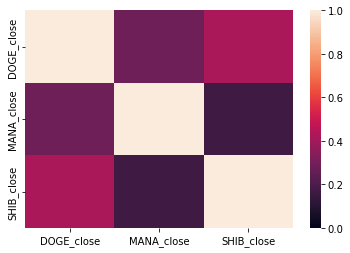

In [92]:
# Calculate the correlation of closing prices between portfolios
price_correlation = df_meme_pct_change.corr()

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=0, vmax=1)

# Refer to markdown for analysis

price_correlation

# Create the Portfolio for COIN CRYPTO CURRENICES 

In [ ]:
XRP_df['date'] = XRP_df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [110]:
df_coin_crypto_1 = pd.merge(BTC_df,XRP_df,on='date',how='inner')
df_coin_crypto_1

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y
0,2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800,0.25680,0.25876,0.246040,0.249370,2.352777e+08
1,2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089,0.24940,0.25051,0.242670,0.246000,1.979608e+08
2,2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718,0.24600,0.24836,0.237300,0.239986,2.078028e+08
3,2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100,0.24052,0.24364,0.238606,0.240800,1.075219e+08
4,2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737,0.24080,0.24398,0.240108,0.242590,6.634275e+07
...,...,...,...,...,...,...,...,...,...,...,...
725,2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537,0.51707,0.54860,0.505850,0.532330,1.395057e+07
726,2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007,0.53259,0.53799,0.493140,0.493640,1.819075e+07
727,2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022,0.49366,0.50224,0.476250,0.486040,1.893797e+07
728,2022-10-12,19058.900000,19240.30,18937.30,19155.92,30512.659581,0.48608,0.49600,0.481800,0.488350,8.994424e+06


In [112]:
XLM_df['date'] = XLM_df['date'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [113]:
df_coin_crypto2 = pd.merge(df_coin_crypto_1,XLM_df,on='date',how='inner')
df_coin_crypto2

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y,open,high,low,close,volume
0,2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800,0.25680,0.25876,0.246040,0.249370,2.352777e+08,0.076463,0.076858,0.073500,0.074010,5.937762e+07
1,2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089,0.24940,0.25051,0.242670,0.246000,1.979608e+08,0.074017,0.074450,0.071800,0.074101,6.376355e+07
2,2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718,0.24600,0.24836,0.237300,0.239986,2.078028e+08,0.074092,0.079293,0.072050,0.079234,1.200103e+08
3,2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100,0.24052,0.24364,0.238606,0.240800,1.075219e+08,0.079077,0.084320,0.077548,0.081606,2.151175e+08
4,2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737,0.24080,0.24398,0.240108,0.242590,6.634275e+07,0.081524,0.082190,0.079170,0.079494,9.266552e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537,0.51707,0.54860,0.505850,0.532330,1.395057e+07,0.126100,0.129690,0.124447,0.128800,7.323484e+07
726,2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007,0.53259,0.53799,0.493140,0.493640,1.819075e+07,0.128808,0.129337,0.123250,0.123692,7.643477e+07
727,2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022,0.49366,0.50224,0.476250,0.486040,1.893797e+07,0.123692,0.124612,0.115357,0.116096,9.767792e+07
728,2022-10-12,19058.900000,19240.30,18937.30,19155.92,30512.659581,0.48608,0.49600,0.481800,0.488350,8.994424e+06,0.116039,0.116750,0.114737,0.116277,5.325957e+07


In [114]:
df_coin_crypto2.columns =['Date','BTC_open', 'BTC_high', 'BTC_low', 'BTC_close', 'BTC_Vol',
                          'XRP_open', 'XRP_high', 'XRP_low', 'XRP_close', 'XRP_Vol', 
                          'XLM_open', 'XLM_high', 'XLM_low', 'XLM_close', 'XLM_Vol']

df_coin_crypto2

,Date,BTC_open,BTC_high,BTC_low,BTC_close,BTC_Vol,XRP_open,XRP_high,XRP_low,XRP_close,XRP_Vol,XLM_open,XLM_high,XLM_low,XLM_close,XLM_Vol
0,2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800,0.25680,0.25876,0.246040,0.249370,2.352777e+08,0.076463,0.076858,0.073500,0.074010,5.937762e+07
1,2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089,0.24940,0.25051,0.242670,0.246000,1.979608e+08,0.074017,0.074450,0.071800,0.074101,6.376355e+07
2,2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718,0.24600,0.24836,0.237300,0.239986,2.078028e+08,0.074092,0.079293,0.072050,0.079234,1.200103e+08
3,2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100,0.24052,0.24364,0.238606,0.240800,1.075219e+08,0.079077,0.084320,0.077548,0.081606,2.151175e+08
4,2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737,0.24080,0.24398,0.240108,0.242590,6.634275e+07,0.081524,0.082190,0.079170,0.079494,9.266552e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537,0.51707,0.54860,0.505850,0.532330,1.395057e+07,0.126100,0.129690,0.124447,0.128800,7.323484e+07
726,2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007,0.53259,0.53799,0.493140,0.493640,1.819075e+07,0.128808,0.129337,0.123250,0.123692,7.643477e+07
727,2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022,0.49366,0.50224,0.476250,0.486040,1.893797e+07,0.123692,0.124612,0.115357,0.116096,9.767792e+07
728,2022-10-12,19058.900000,19240.30,18937.30,19155.92,30512.659581,0.48608,0.49600,0.481800,0.488350,8.994424e+06,0.116039,0.116750,0.114737,0.116277,5.325957e+07


In [115]:
df_coin = df_coin_crypto2[['Date','BTC_close','XRP_close','XLM_close']]
df_coin

,Date,BTC_close,XRP_close,XLM_close
0,2020-10-14,11427.70,0.249370,0.074010
1,2020-10-15,11509.34,0.246000,0.074101
2,2020-10-16,11328.95,0.239986,0.079234
3,2020-10-17,11367.89,0.240800,0.081606
4,2020-10-18,11506.16,0.242590,0.079494
...,...,...,...,...
725,2022-10-09,19443.50,0.532330,0.128800
726,2022-10-10,19132.83,0.493640,0.123692
727,2022-10-11,19058.11,0.486040,0.116096
728,2022-10-12,19155.92,0.488350,0.116277


In [116]:
df_coin_pct_change = df_coin.set_index('Date').pct_change()
df_coin_pct_change

,BTC_close,XRP_close,XLM_close
Date,,,
2020-10-14,NaN,NaN,NaN
2020-10-15,0.007144,-0.013514,0.001230
2020-10-16,-0.015673,-0.024447,0.069270
2020-10-17,0.003437,0.003392,0.029937
2020-10-18,0.012163,0.007434,-0.025880
...,...,...,...
2022-10-09,0.001231,0.029234,0.021169
2022-10-10,-0.015978,-0.072680,-0.039658
2022-10-11,-0.003905,-0.015396,-0.061411


In [119]:
df_coin_pct_change.hvplot(figsize = (20,10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,BTC_close,XRP_close,XLM_close
BTC_close,1.000000,0.533718,0.602294
XRP_close,0.533718,1.000000,0.680982
XLM_close,0.602294,0.680982,1.000000


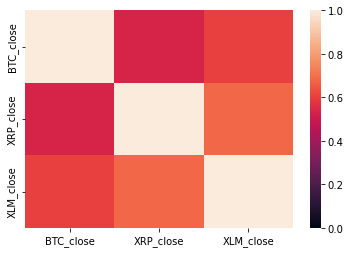

In [118]:
# Calculate the correlation of closing prices between portfolios
price_correlation = df_coin_pct_change.corr()

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation, vmin=0, vmax=1)

# Refer to markdown for analysis

price_correlation

# Create the Portfolio for CHAIN CRYPTO CURRENICES 

In [120]:
df_chain_crypto_1 = pd.merge(ETH_df,SOL_df,on='date',how='inner')
df_chain_crypto_1

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y
0,2021-02-25,1625.27,1672.910000,1448.59300,1481.680,8.419691e+05,24.600,24.600,13.821,13.823,7.088429e+04
1,2021-02-26,1485.30,1564.110000,1400.00000,1445.180,9.534779e+05,13.854,15.404,13.167,13.612,1.314144e+05
2,2021-02-27,1445.21,1527.700000,1420.00000,1460.570,6.510106e+05,13.590,14.691,13.118,13.197,1.979224e+05
3,2021-02-28,1460.49,1471.300000,1289.09800,1414.904,1.025401e+06,13.179,13.741,11.556,13.096,2.106576e+05
4,2021-03-01,1424.40,1574.280000,1407.18100,1569.800,8.791135e+05,13.109,16.890,13.098,14.992,1.821690e+05
...,...,...,...,...,...,...,...,...,...,...,...
589,2022-10-07,1352.18,1362.140000,1317.14808,1331.000,3.417707e+05,33.346,33.780,32.423,32.980,1.159911e+06
590,2022-10-08,1331.12,1337.700000,1303.60000,1315.710,1.014183e+05,32.970,33.070,32.360,32.590,6.168081e+05
591,2022-10-09,1315.26,1329.330000,1307.21000,1323.410,1.166758e+05,32.571,33.140,32.450,32.930,4.778466e+05
592,2022-10-10,1323.23,1338.410000,1287.31000,1290.060,2.997284e+05,32.920,33.460,31.860,31.950,9.062605e+05


In [121]:
df_chain_crypto2 = pd.merge(df_chain_crypto_1,MATIC_df,on='date',how='inner')
df_chain_crypto2

,date,open_x,high_x,low_x,close_x,volume_x,open_y,high_y,low_y,close_y,volume_y,open,high,low,close,volume
0,2021-03-11,1795.550,1849.900000,1723.84000,1824.128000,597860.812721,14.520,16.700,13.755,15.974,4.406147e+04,0.3871,0.5900,0.3140,0.4243,2.264423e+08
1,2021-03-12,1827.540,1845.700000,1720.55000,1767.350000,569154.896537,16.104,16.500,14.214,14.632,2.994309e+04,0.4250,0.5376,0.3924,0.4145,3.999491e+08
2,2021-03-13,1766.760,1944.000000,1727.70000,1921.500000,654200.783657,14.707,15.429,14.009,15.333,1.601566e+04,0.4147,0.4694,0.4097,0.4249,1.730590e+08
3,2021-03-14,1922.467,1933.000000,1836.61000,1847.968307,482679.407652,15.359,15.374,14.412,14.583,1.224949e+04,0.4274,0.4385,0.3727,0.3806,1.189302e+08
4,2021-03-15,1848.560,1893.750000,1732.00000,1796.000000,795273.129560,14.513,14.792,13.747,14.214,4.366670e+04,0.3812,0.4300,0.3781,0.3912,1.156087e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2022-10-07,1352.180,1362.140000,1317.14808,1331.000000,341770.659790,33.346,33.780,32.423,32.980,1.159911e+06,0.8338,0.8484,0.8184,0.8315,2.002077e+07
576,2022-10-08,1331.120,1337.700000,1303.60000,1315.710000,101418.347412,32.970,33.070,32.360,32.590,6.168081e+05,0.8314,0.8348,0.8081,0.8148,8.173766e+06
577,2022-10-09,1315.260,1329.330000,1307.21000,1323.410000,116675.842467,32.571,33.140,32.450,32.930,4.778466e+05,0.8146,0.8304,0.8079,0.8257,7.158747e+06
578,2022-10-10,1323.230,1338.410000,1287.31000,1290.060000,299728.380746,32.920,33.460,31.860,31.950,9.062605e+05,0.8257,0.8431,0.8117,0.8137,2.261801e+07


In [122]:
df_chain_crypto2.columns =['Date','ETH_open', 'ETH_high', 'ETH_low', 'ETH_close', 'ETH_Vol',
                          'SOL_open', 'SOL_high', 'SOL_low', 'SOL_close', 'SOL_Vol', 
                          'MATIC_open', 'MATIC_high', 'MATIC_low', 'MATIC_close', 'MATIC_Vol']

df_chain_crypto2

,Date,ETH_open,ETH_high,ETH_low,ETH_close,ETH_Vol,SOL_open,SOL_high,SOL_low,SOL_close,SOL_Vol,MATIC_open,MATIC_high,MATIC_low,MATIC_close,MATIC_Vol
0,2021-03-11,1795.550,1849.900000,1723.84000,1824.128000,597860.812721,14.520,16.700,13.755,15.974,4.406147e+04,0.3871,0.5900,0.3140,0.4243,2.264423e+08
1,2021-03-12,1827.540,1845.700000,1720.55000,1767.350000,569154.896537,16.104,16.500,14.214,14.632,2.994309e+04,0.4250,0.5376,0.3924,0.4145,3.999491e+08
2,2021-03-13,1766.760,1944.000000,1727.70000,1921.500000,654200.783657,14.707,15.429,14.009,15.333,1.601566e+04,0.4147,0.4694,0.4097,0.4249,1.730590e+08
3,2021-03-14,1922.467,1933.000000,1836.61000,1847.968307,482679.407652,15.359,15.374,14.412,14.583,1.224949e+04,0.4274,0.4385,0.3727,0.3806,1.189302e+08
4,2021-03-15,1848.560,1893.750000,1732.00000,1796.000000,795273.129560,14.513,14.792,13.747,14.214,4.366670e+04,0.3812,0.4300,0.3781,0.3912,1.156087e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2022-10-07,1352.180,1362.140000,1317.14808,1331.000000,341770.659790,33.346,33.780,32.423,32.980,1.159911e+06,0.8338,0.8484,0.8184,0.8315,2.002077e+07
576,2022-10-08,1331.120,1337.700000,1303.60000,1315.710000,101418.347412,32.970,33.070,32.360,32.590,6.168081e+05,0.8314,0.8348,0.8081,0.8148,8.173766e+06
577,2022-10-09,1315.260,1329.330000,1307.21000,1323.410000,116675.842467,32.571,33.140,32.450,32.930,4.778466e+05,0.8146,0.8304,0.8079,0.8257,7.158747e+06
578,2022-10-10,1323.230,1338.410000,1287.31000,1290.060000,299728.380746,32.920,33.460,31.860,31.950,9.062605e+05,0.8257,0.8431,0.8117,0.8137,2.261801e+07


In [124]:
df_chain = df_chain_crypto2[['Date','ETH_close','SOL_close','MATIC_close']]
df_chain

,Date,ETH_close,SOL_close,MATIC_close
0,2021-03-11,1824.128000,15.974,0.4243
1,2021-03-12,1767.350000,14.632,0.4145
2,2021-03-13,1921.500000,15.333,0.4249
3,2021-03-14,1847.968307,14.583,0.3806
4,2021-03-15,1796.000000,14.214,0.3912
...,...,...,...,...
575,2022-10-07,1331.000000,32.980,0.8315
576,2022-10-08,1315.710000,32.590,0.8148
577,2022-10-09,1323.410000,32.930,0.8257
578,2022-10-10,1290.060000,31.950,0.8137


In [125]:
df_chain_pct_change = df_chain.set_index('Date').pct_change()
df_chain_pct_change

,ETH_close,SOL_close,MATIC_close
Date,,,
2021-03-11,NaN,NaN,NaN
2021-03-12,-0.031126,-0.084012,-0.023097
2021-03-13,0.087221,0.047909,0.025090
2021-03-14,-0.038268,-0.048914,-0.104260
2021-03-15,-0.028122,-0.025303,0.027851
...,...,...,...
2022-10-07,-0.015707,-0.011687,-0.002758
2022-10-08,-0.011488,-0.011825,-0.020084
2022-10-09,0.005852,0.010433,0.013378


In [126]:
df_chain_pct_change.hvplot(figsize = (20,10))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

,ETH_close,SOL_close,MATIC_close
ETH_close,1.000000,0.670849,0.725436
SOL_close,0.670849,1.000000,0.551356
MATIC_close,0.725436,0.551356,1.000000


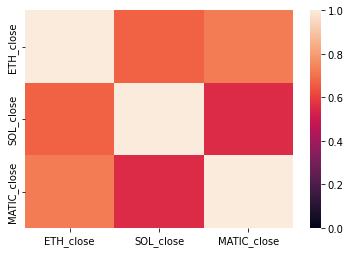

In [127]:
# Calculate the correlation of closing prices between portfolios
price_correlation_chain = df_chain_pct_change.corr()

# Use the `heatmap` function from the seaborn library to visualize correlations
sns.heatmap(price_correlation_chain, vmin=0, vmax=1)

# Refer to markdown for analysis

price_correlation_chain

# MONTY CARLOS SIMULATIONS for portfolios

In [175]:
basket1 = ['ETH-USD','SOL-USD','MATIC-USD']
basket2 = ['BTC-USD','XRP-USD','XLM-USD']
basket3 = ['DOGE-USD','SHIB-USD','MANA-USD']

In [176]:
def get_data(cryptocurrency):
    cryptocurrency_df = yf.download(cryptocurrency, period = '2y')['Close']
    cryptocurrency_df.dropna(inplace = True)
    return cryptocurrency_df

In [177]:
def fetch_last_price(cryptocurrency_df, basket):
    # Save the last day's closing price
    curr_last_price_1 = cryptocurrency_df[basket[0]][-1]
    curr_last_price_2 = cryptocurrency_df[basket[1]][-1]
    curr_last_price_3 = cryptocurrency_df[basket[2]][-1]
    return curr_last_price_1, curr_last_price_2, curr_last_price_3


In [178]:
def pct_change_std_mean(cryptocurrency_df):
    # Calculate the daily roi for the stocks
    daily_returns_cryptocurrency = cryptocurrency_df.pct_change()
    # Calculate volatility
    std_dev_daily_return = daily_returns_cryptocurrency.std()
    avg_daily_return = daily_returns_cryptocurrency.mean()
    return daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return



In [179]:
def monte_carlo_simulation(basket):
    # Setup the Monte Carlo Parameters
    number_simulations = 100
    number_records = 90
    monte_carlo = pd.DataFrame()
    # Run the Monte Carlo Simulation
    for x in range(number_simulations):

        print(f"Running Simulation {x}...")

        curr1_price = [curr1_last_price]
        curr2_price = [curr2_last_price]
        curr3_price = [curr3_last_price]

        for n in range(number_records):

            simulated_prices = curr1_price[-1] * (1 + np.random.normal(avg_daily_return[basket[0]], std_dev_daily_return[basket[0]]))
            curr1_price.append(simulated_prices)

            simulated_prices = curr2_price[-1] * (1 + np.random.normal(avg_daily_return[basket[1]], std_dev_daily_return[basket[1]]))
            curr2_price.append(simulated_prices)

            simulated_prices = curr3_price[-1] * (1 + np.random.normal(avg_daily_return[basket[2]], std_dev_daily_return[basket[2]]))
            curr3_price.append(simulated_prices)

       # Create a DataFrame of the simulated prices  
        portfolio = pd.DataFrame({
            f"{basket[0]} Simulated Prices": curr1_price,
            f"{basket[1]} Simulated Prices": curr2_price,
            f"{basket[2]} Simulated Prices": curr3_price
        })


        portfolio_returns=portfolio.pct_change()   

        weights = [0.50, 0.25, 0.25]


        weighted_portfolio_returns = portfolio_returns.dot(weights) 

        monte_carlo[x] = (1+ weighted_portfolio_returns.fillna(0)).cumprod()
    return monte_carlo



In [180]:
def graph(basket):
    # Visualize the Simulation
    monte_carlo.plot(legend=None, title = f"Simulated {basket[0]} {basket[1]} {basket[2]} Portfolio over the next 90 days")
    plt.show() 
    

In [181]:
def graph2(basket):
    cumulative_returns = monte_carlo.iloc[-1]
    confidence_intervals = cumulative_returns.quantile(q=[0.05, 0.95])
    crypto_returns = cumulative_returns
    crypto_conf_interval = confidence_intervals

    crypto_returns.plot(kind='hist', bins=10, title = f"Confidence Interval of {basket[0]} {basket[1]} {basket[2]} Portfolio")
    plt.axvline(crypto_conf_interval.iloc[0], color='r')
    plt.axvline(crypto_conf_interval.iloc[1], color='r')
    plt.show()

## CHAIN CRYPTO CURRENCIES - MONTY CARLOS with Weights .50, .25, .25

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

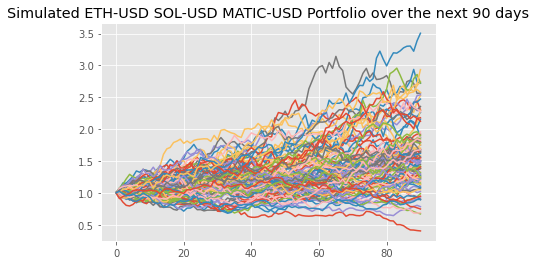

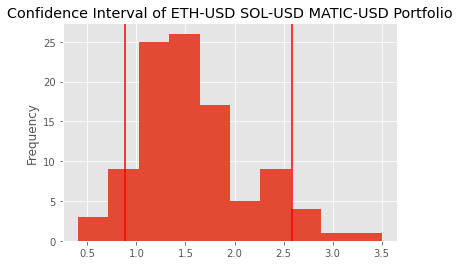

,ETH-USD,MATIC-USD,SOL-USD
ETH-USD,1.000000,0.854327,0.875912
MATIC-USD,0.854327,1.000000,0.805450
SOL-USD,0.875912,0.805450,1.000000


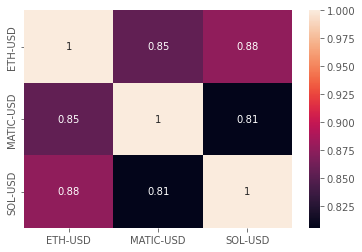

In [182]:
df = get_data(basket1)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket1)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket1)
graph(basket1)
graph2(basket1)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

## COIN CRYPTO CURRENCIES - MONTY CARLOS with weights 0.50, 0.25 and 0.25

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

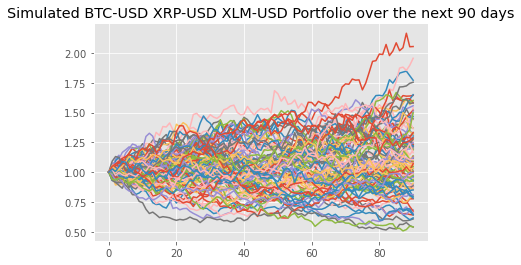

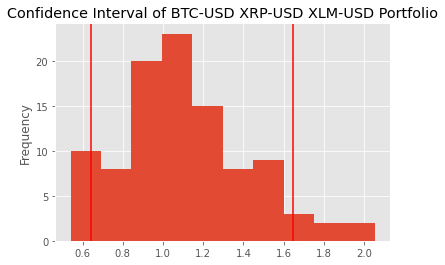

,BTC-USD,XLM-USD,XRP-USD
BTC-USD,1.000000,0.818022,0.753248
XLM-USD,0.818022,1.000000,0.747336
XRP-USD,0.753248,0.747336,1.000000


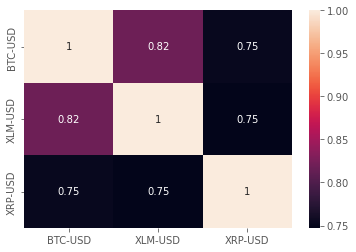

In [183]:
df = get_data(basket2)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket2)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket2)
graph(basket2)
graph2(basket2)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

## MEME CRYPTO CURRENCIES - MONTY CARLOS with weights 0.50, 0.25 and 0.25

[*********************100%***********************]  3 of 3 completed
Running Simulation 0...
Running Simulation 1...
Running Simulation 2...
Running Simulation 3...
Running Simulation 4...
Running Simulation 5...
Running Simulation 6...
Running Simulation 7...
Running Simulation 8...
Running Simulation 9...
Running Simulation 10...
Running Simulation 11...
Running Simulation 12...
Running Simulation 13...
Running Simulation 14...
Running Simulation 15...
Running Simulation 16...
Running Simulation 17...
Running Simulation 18...
Running Simulation 19...
Running Simulation 20...
Running Simulation 21...
Running Simulation 22...
Running Simulation 23...
Running Simulation 24...
Running Simulation 25...
Running Simulation 26...
Running Simulation 27...
Running Simulation 28...
Running Simulation 29...
Running Simulation 30...
Running Simulation 31...
Running Simulation 32...
Running Simulation 33...
Running Simulation 34...
Running Simulation 35...
Running Simulation 36...
Running Simulati

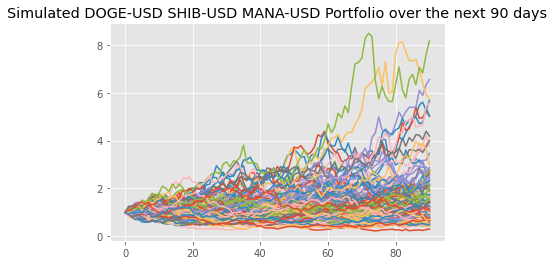

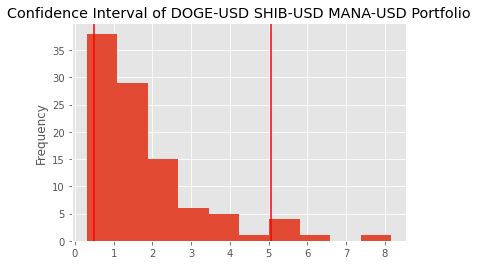

,DOGE-USD,MANA-USD,SHIB-USD
DOGE-USD,1.000000,0.304340,0.338569
MANA-USD,0.304340,1.000000,0.811569
SHIB-USD,0.338569,0.811569,1.000000


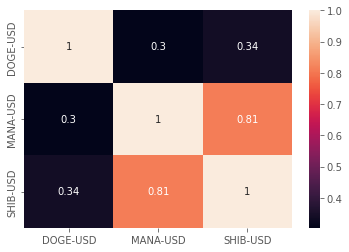

In [184]:
df = get_data(basket3)
curr1_last_price,curr2_last_price, curr3_last_price = fetch_last_price(df, basket3)
daily_returns_cryptocurrency, std_dev_daily_return, avg_daily_return = pct_change_std_mean(df)
monte_carlo = monte_carlo_simulation(basket3)
graph(basket3)
graph2(basket3)
#correlation
display(df.corr())
sns.heatmap(df.corr(), annot=True)
plt.show()

# BUY & HOLD STRATEGY RESULTS 

## COIN PORTFOLIO 

:Curve   [Date]   (0)

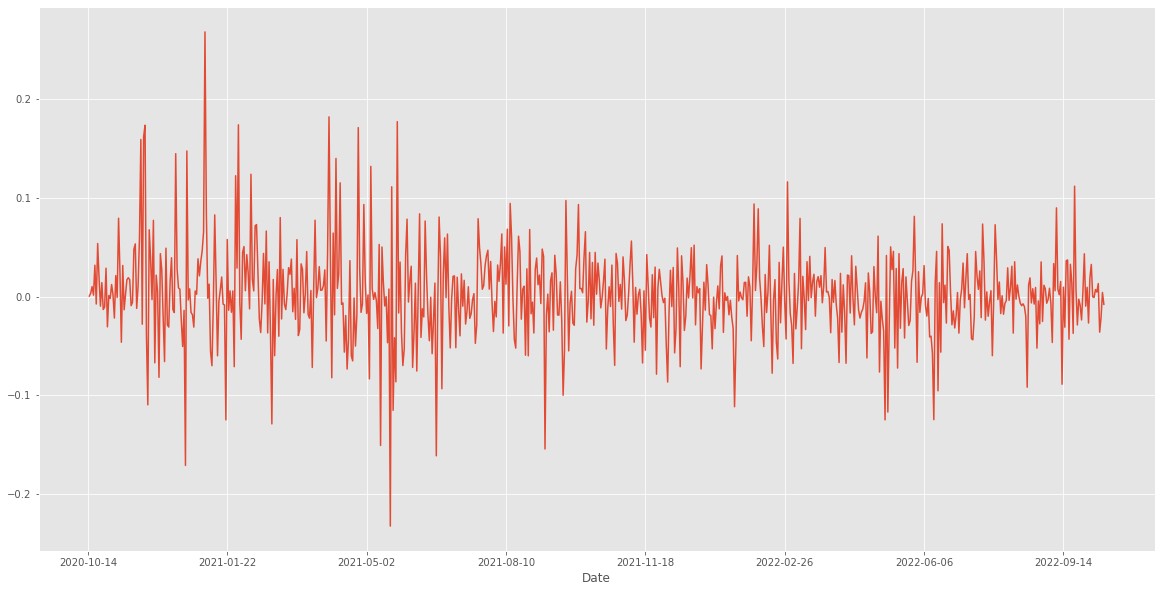

In [186]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.
weights = [0.50, 0.25, 0.25]

# Use the `dot` function to sum the product each weight and the corresponding daily return.
coin_portfolio_returns = df_coin_pct_change.dot(weights)

# Diplay sample values
coin_portfolio_returns.plot(figsize = (20,10))

# Use the `cumprod` function to calculate cumulative returns
coin_cumulative_returns = (1 + coin_portfolio_returns).cumprod()

# Display sample values
coin_cumulative_returns.head()

# Set initial investment
initial_investment = 100000

# Compute cumulative returns
coin_cumulative_profit = initial_investment * coin_cumulative_returns

# Plot the returns of the investment
coin_cumulative_profit.hvplot(figsize=(20,10), yformatter='%.0f')

## CHAIN PORTFOLIO 

:Curve   [Date]   (0)

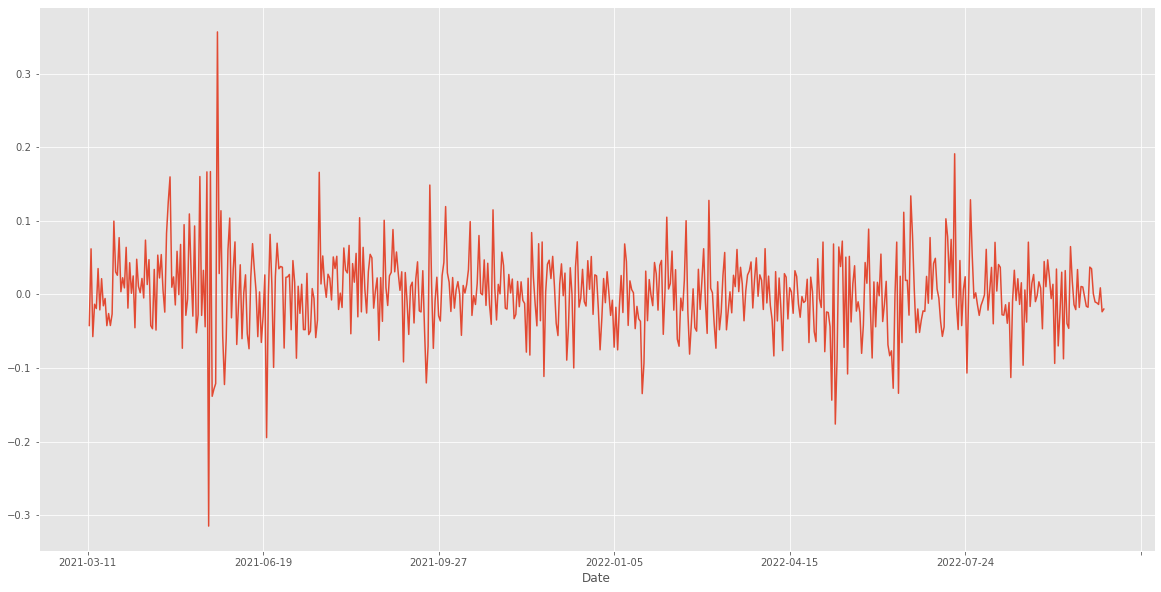

In [187]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.

weights = [0.50, 0.25, 0.25]

# Use the `dot` function to sum the product each weight and the corresponding daily return.
chain_portfolio_returns = df_chain_pct_change.dot(weights)

# Diplay sample values
chain_portfolio_returns.plot(figsize = (20,10))

# Use the `cumprod` function to calculate cumulative returns
chain_cumulative_returns = (1 + chain_portfolio_returns).cumprod()

# Display sample values
chain_cumulative_returns.head()

# Set initial investment
initial_investment = 100000

# Compute cumulative returns
chain_cumulative_profit = initial_investment * chain_cumulative_returns


# Plot the returns of the investment
chain_cumulative_profit.hvplot(figsize=(20,10), yformatter='%.0f')

## MEME PORTFOLIO

:Curve   [Date]   (0)

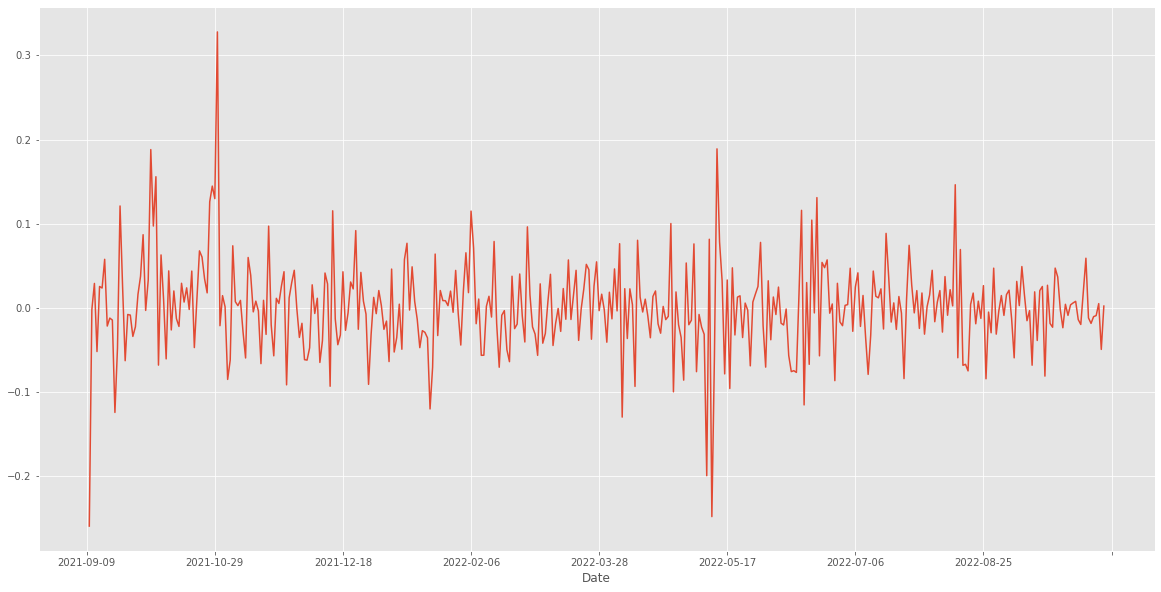

In [188]:
#Calculate the weighted returns for your portfolio, assuming equal number of shares per stock.
# Set weights for corresponding of stocks: GOOG, AAL, NVDA, TSLA, ICNL at 20%
weights = [0.50, 0.25, 0.25]

# Use the `dot` function to sum the product each weight and the corresponding daily return.
memeportfolio_returns = df_meme_pct_change.dot(weights)

# Diplay sample values
memeportfolio_returns.plot(figsize = (20,10))

# Use the `cumprod` function to calculate cumulative returns
memecumulative_returns = (1 + memeportfolio_returns).cumprod()

# Display sample values
memecumulative_returns.head()

# Set initial investment
initial_investment = 100000

# Compute cumulative returns
memecumulative_profit = initial_investment * memecumulative_returns

# Plot the returns of the investment
memecumulative_profit.hvplot(figsize=(20,10),yformatter='%.0f')

### PROFIT & LOSS PORTFOLIO WISE 

In [189]:
coin_cumulative_profit

Date
2020-10-14              NaN
2020-10-15    100050.089940
2020-10-16    100387.169970
2020-10-17    101396.134596
2020-10-18    101545.174721
                  ...      
2022-10-09    250622.112059
2022-10-10    241581.229763
2022-10-11    236470.754358
2022-10-12    237450.697822
2022-10-13    235581.552425
Length: 730, dtype: float64

In [190]:
chain_cumulative_profit

Date
2021-03-11              NaN
2021-03-12     95765.985137
2021-03-13    101690.095908
2021-03-14     95850.296768
2021-03-15     94563.592916
                  ...      
2022-10-07    159416.426642
2022-10-08    157229.044340
2022-10-09    158625.036645
2022-10-10    154869.853674
2022-10-11    151779.194088
Length: 580, dtype: float64

In [192]:
memecumulative_profit

Date
2021-09-09             NaN
2021-09-10    74020.562616
2021-09-11    73857.576947
2021-09-12    75988.388364
2021-09-13    72023.160852
                  ...     
2022-10-07    61664.977048
2022-10-08    61085.871105
2022-10-09    61381.928910
2022-10-10    58335.236665
2022-10-11    58447.882217
Length: 398, dtype: float64

# PATTERN RECOGNITION USING TALIB

In [194]:
self = CandleStickPatterns(market='crypto')

In [195]:
ticker = 'BTCUSD'

In [196]:
total_patterns = 60

In [199]:
# GET ALL THE FAILED TICKERS (STUFF THAT FAILED TO DOWNLOAD)
failed_ticker_path = os.path.join(self.src_database,"failed_tickers.json")

print (failed_ticker_path)

../blockchainbot/Data_management/crypto/Database/failed_tickers.json


In [202]:
with open(failed_ticker_path,'r') as f:
    failed_tickers = json.loads(f.read())
    f.close()
failed_tickers  = failed_tickers['failed_tickers']
failed_tickers

['AEUSD',
 'AIDUSD',
 'B2XUSD',
 'BABUSD',
 'BBNUSD',
 'BCHSVUSD',
 'BCIUSD',
 'BITSUSD',
 'BIXUSD',
 'BTCPUSD',
 'BTSUSD',
 'CCLUSD',
 'CDCCUSD',
 'CMTUSD',
 'CTXCUSD',
 'CVHUSD',
 'DADIUSD',
 'DBETUSD',
 'DIMUSD',
 'DNYUSD',
 'DORUSD',
 'DTHUSD',
 'DWSUSD',
 'EJOYUSD',
 'FSNUSD',
 'FUELUSD',
 'GXCUSD',
 'HANDUSD',
 'HB10USD',
 'HCUSD',
 'HITUSD',
 'HPTUSD',
 'INTUSD',
 'ITCUSD',
 'KRMUSD',
 'LETUSD',
 'LUCUSD',
 'MCOUSD',
 'MDSUSD',
 'MESSEUSD',
 'MITUSD',
 'MNXUSD',
 'MORPHUSD',
 'MRSUSD',
 'NASUSD',
 'NIOUSD',
 'NOAHUSD',
 'NULSUSD',
 'OCNUSD',
 'PATUSD',
 'PETHUSD',
 'QNTUUSD',
 'RUFFUSD',
 'SENUSD',
 'SOCUSD',
 'SPFUSD',
 'STEEMUSD',
 'STQUSD',
 'STRUSD',
 'STUUSD',
 'TDSUSD',
 'TIVUSD',
 'TKAUSD',
 'TUSDUSD',
 'VOCOUSD',
 'WICCUSD',
 'WIZUSD',
 'WLOUSD',
 'AUTUSD',
 'DCUSD',
 'DNUSD',
 'EMUSD',
 'LMUSD',
 'MOUSD',
 'MRUSD',
 'RAUSD',
 'RDUSD',
 'RPUSD',
 'SNUSD',
 'TZUSD',
 'UCUSD',
 'VGUSD',
 'YOUSD']

In [203]:
tickers = [t for t in self.ticker_universe.ticker.tolist() if t not in failed_tickers]


In [204]:
patterns = []
# ITERATE THROUGH ALL THE CRYPTOS AND EXTRACT PATTERNS FOR THE LASTEST DATA
for ticker in tqdm(tickers):
    pattern_df = self.get_patterns(ticker)
    last_candle_pattern = pattern_df[pattern_df!=0].iloc[-1,6:]
    # Looking at the latest value in dataframe with non zero values
    x = last_candle_pattern
    x.dropna(inplace=True)
    # TAKE AN AVERAGE OF NON-ZERO AS A RATING AND PATTERN NAMES IN THE COLUMN
    if len(x)>0:
        patterns.append([ticker, "Bullish" if sum(x)/len(x)>0 else "Bearish", ",".join(x.index.tolist())])
    else:
        patterns.append([ticker, "Neutral", "No Patterns"])

100%|█████████████████████████████████████████| 297/297 [00:18<00:00, 16.08it/s]


In [206]:
last_pattern_df = pd.DataFrame(patterns,columns=['Ticker','Signal','Patterns'])
last_pattern_df

,Ticker,Signal,Patterns
0,1INCHUSD,Bearish,Short Line Candle
1,AAVEUSD,Bearish,"hold,Long Line Candle"
2,ACATUSD,Bullish,"Doji,Gravestone Doji,Long Legged Doji,Shooting..."
3,ACHUSD,Bearish,"hold,Closing Marubozu,Long Line Candle,Marubozu"
4,ACTUSD,Bullish,"Doji,Short Line Candle"
...,...,...,...
292,ZENUSD,Bullish,"Doji,Wave Candle,Long Legged Doji,Matching Low..."
293,ZILUSD,Bullish,"Doji,Gravestone Doji,Long Legged Doji"
294,ZMTUSD,Bullish,"Wave Candle,Spinning Top"
295,ZRXUSD,Bullish,"Doji,Harami Pattern,Harami Cross Pattern,Wave ..."


In [207]:
last_pattern_df.set_index("Ticker",inplace=True)

<AxesSubplot:title={'center':'Total Bull Bear Neutral Cryptos'}, xlabel='Signal'>

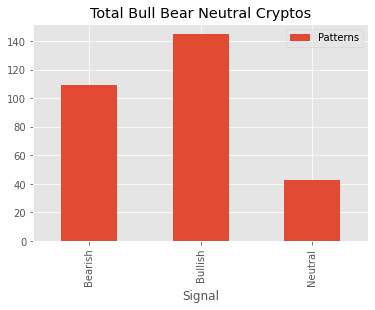

In [208]:
last_pattern_df.groupby('Signal').count().plot(kind='bar',title='Total Bull Bear Neutral Cryptos')

# TRADING STRATEGY SIGNALS

### Talib library to feed crypto price data and get 200D simple moving average (SMA) technical data or other TA such as RSI, Bollinger bans.



In [214]:
BTC_df

,date,open,high,low,close,volume
0,2020-10-14,11443.000000,11564.00,11284.27,11427.70,38608.497800
1,2020-10-15,11417.850000,11641.38,11250.01,11509.34,46171.175089
2,2020-10-16,11511.949706,11550.01,11180.03,11328.95,46579.069718
3,2020-10-17,11324.883733,11421.00,11254.39,11367.89,24395.470100
4,2020-10-18,11376.000000,11526.34,11345.55,11506.16,20420.817737
...,...,...,...,...,...,...
725,2022-10-09,19420.000000,19563.28,19321.00,19443.50,14566.224537
726,2022-10-10,19442.700000,19528.04,19000.00,19132.83,33911.302007
727,2022-10-11,19130.330000,19265.69,18855.19,19058.11,48590.425022
728,2022-10-12,19058.900000,19240.30,18937.30,19155.92,30512.659581


In [224]:
# dataframe that contains all the price and TA data.

Mov =talib.SMA(BTC_df['close'], timeperiod=200)
Rsi =talib.RSI(BTC_df['close'], timeperiod=14)
Mov_chg= Mov.pct_change()*100 
upper, middle, lower = talib.BBANDS(BTC_df['close'], timeperiod=10, nbdevup=2, nbdevdn=2, matype=0)
BTC_df['BBU'] = upper
BTC_df['BBM'] = middle
BTC_df['BBL'] = lower
BTC_df['RSI14'] =Rsi
BTC_df['Mov'] = Mov
BTC_df['Mov_chg']=Mov_chg

In [242]:
# Signal Data frame based on moving strategy.

signal = pd.DataFrame(index =BTC_df.index, data={'Signal': np.array([np.nan]*BTC_df.index.shape[0])})
signal.loc[((Mov_chg>0.02) & (BTC_df['close'] < BTC_df['Mov'])), 'Signal'] = 1  
signal.loc[(Mov_chg<-0.00), 'Signal'] = -1
signal.iloc[0]= -1
signal.ffill(inplace=True)
signal['Order'] = signal.diff()    ##'Signal' start with -1 on start day, 'Order' = buy when 2 , sell when -2

In [250]:
##'Signal' start with -1 on start day, 'Order' = buy when 2 , sell when -2
signal

,Signal,Order
0,-1.0,NaN
1,-1.0,0.0
2,-1.0,0.0
3,-1.0,0.0
4,-1.0,0.0
...,...,...
725,-1.0,0.0
726,-1.0,0.0
727,-1.0,0.0
728,-1.0,0.0


In [258]:
signal['Order'].hvplot.bar()

:Bars   [index]   (Order)

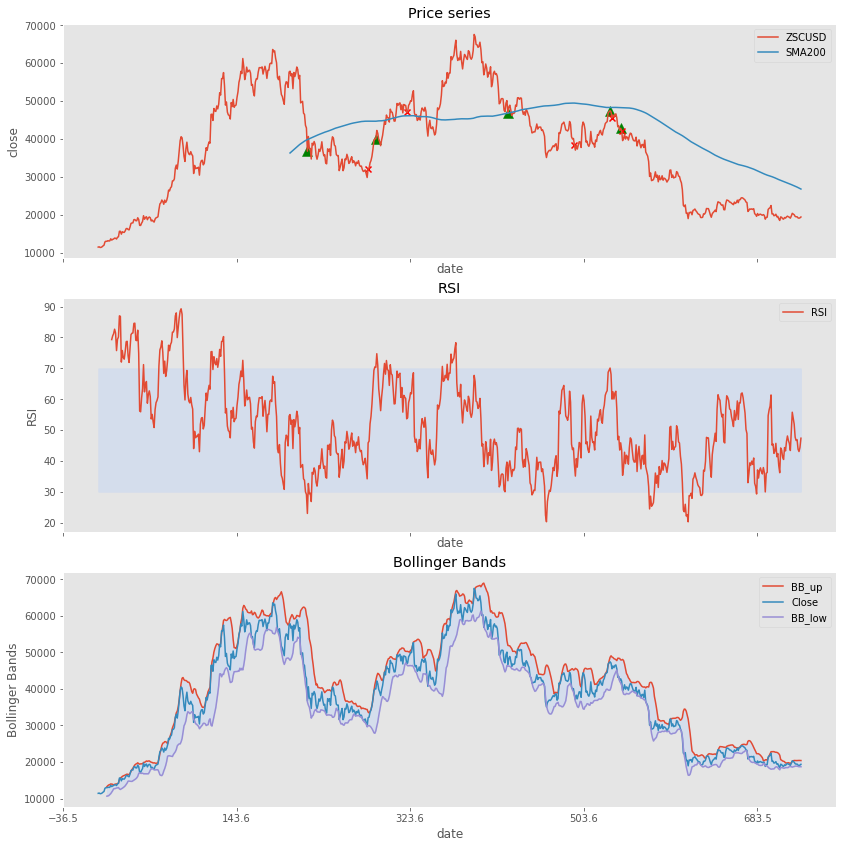

In [248]:
# the price data, TA data and buy/sell signals into charts.

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(12, 12))
fig.tight_layout(pad=3.0)
ax0.plot(BTC_df.index, BTC_df['close'], label=ticker)
ax0.plot(BTC_df.index,BTC_df['Mov'], label='SMA200')
ax0.set_xlabel('date')
ax0.set_ylabel('close')
ax0.set_title('Price series')
ax0.legend()
ax0.grid()


for day, order in signal.iterrows():
    order = order['Order']
    if order == 2:
        ax0.scatter(x=day, y=BTC_df.loc[day, 'close'],marker='^', s=100, color='green')
    elif order==-2:
        ax0.scatter(x=day, y=BTC_df.loc[day, 'close'],marker='x', color='red')


ax1.plot(BTC_df.index,BTC_df['RSI14'], label='RSI')
ax1.fill_between(BTC_df.index, y1=30, y2=70, color='#adccff', alpha=0.3)
ax1.set_xlabel('date')
ax1.set_ylabel('RSI')
ax1.set_title('RSI')
ax1.grid()
ax1.legend()

ax2.plot(BTC_df.index,BTC_df['BBU'], label='BB_up')
ax2.plot(BTC_df.index,BTC_df['close'], label='Close')
ax2.plot(BTC_df.index,BTC_df['BBL'], label='BB_low')
ax2.fill_between(BTC_df.index,y1=BTC_df['BBU'], y2=BTC_df['BBL'], color='#adccff', alpha=0.3)
start, end = ax2.get_xlim()
ax2.xaxis.set_ticks(np.arange(start, end, 180))
ax2.set_xlabel('date')
ax2.set_ylabel('Bollinger Bands')
ax2.set_title('Bollinger Bands')
ax2.grid()
ax2.legend()

# Visualize CANDLE STICK Patterns 

In [259]:
# Visualize Candle Sticks

o = BTC_df['open'].astype(float)
h = BTC_df['high'].astype(float)
l = BTC_df['low'].astype(float)
c = BTC_df['close'].astype(float)

trace = go.Candlestick(
            open=o,
            high=h,
            low=l,
            close=c)
data = [trace]

plot(data, filename='go_candle1.html')

'go_candle1.html'